# Project 1
**Finding the Higgs Boson**
![Higgs Boson](https://home.cern/sites/home.web.cern.ch/files/styles/medium/public/image/featured/2014/01/higgs_event_display_1.jpg?itok=0zdD0QEr)

## Importing libs and modules

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from proj1_helpers import *
from implementations import *
from plots import *

### Datasets path

In [2]:
train_path = './data/train.csv'
test_path = './data/test.csv'

### Hyperparams, will be used with logistic regression

In [3]:
max_iter = 10000
threshold = 1e-8
gamma = 0.01
losses = []

## Loading datasets

In [4]:
y, x, ids = load_csv_data(train_path)
ytest, xtest, idstest = load_csv_data(test_path)

## Removing column features

In [5]:
columns_feature_to_delete = [15,18,20,25,28]
x = np.delete(x, columns_feature_to_delete, 1)
xtest = np.delete(xtest, columns_feature_to_delete, 1)

In [6]:
x[np.where(x == -999)] = np.nan

In [7]:
x, mean_x, std_x = standardize(x)
xtest, mean_xtest, std_xtest = standardize(xtest)

In [8]:
x = np.nan_to_num(x)

# Logistic regression

In [9]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and hessian: TODO
    # ***************************************************
    print('here it is')
    loss, gradient, hessian = logistic_regression(y,tx,w)
    
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    print('here it is')
    termine = np.linalg.solve(hessian,gradient)
    w = w-termine
    
    #raise NotImplementedError
    return loss, w

In [10]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.01
    losses = []

    print('Here')
    # build tx
    w = np.zeros((x.shape[1], 1))
    print(w.shape)
    print('now here')
    # start the logistic regression
    for iter in range(max_iter):
        print('boom')
        # get loss and update w.
        loss, w = learning_by_newton_method(y, x, w)
        print('boooooom')
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

In [11]:
degree = 1
px_train = build_poly(degree=degree,x=x)
px_test = build_poly(degree=degree,x=xtest)

In [ ]:
print(y.shape)
logistic_regression_newton_method_demo(y, px_train)

(250000,)
Here
(26, 1)
now here
boom
here it is
hessian
cussomak
cussomak
cussomak
cussomak
[[ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.06833197  0.55250482  3.19515553 ...,  0.31931645 -0.84532397
   0.66533608]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.4125105  -0.27381996 -0.29396985 ..., -0.31701723 -0.74543941
  -0.74543941]]
[[ 0.25  0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.25  0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.25 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.25  0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.25  0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.25]]


In [ ]:
v1 = np.array([1,2,3])
v2 = np.matrix([1,2,3])
np.reshape(v2, (3,1))


In [10]:
print(px_train.shape)
print(px_test.shape)

(250000, 151)
(568238, 151)


# With ridge regression

In [11]:
ws = ridge_regression(lambda_=0.00067233575365, tx=px_train, y=y)

# With Logistic Regression

In [12]:
y_pred = predict_labels(ws, px_test)

In [13]:
create_csv_submission(idstest, y_pred, 'prediction.csv')

# Prepare data for k-fold cross validation

After lambdas iteration, the best lambda is : 0.000923670857187 for k-fold : 0 with best loss = 0.32320282507
After lambdas iteration, the best lambda is : 0.00067233575365 for k-fold : 1 with best loss = 0.318268149501
After lambdas iteration, the best lambda is : 0.00067233575365 for k-fold : 2 with best loss = 0.318268149501
After lambdas iteration, the best lambda is : 0.00067233575365 for k-fold : 3 with best loss = 0.318268149501
After lambdas iteration, the best lambda is : 0.00067233575365 for k-fold : 4 with best loss = 0.318268149501
After lambdas iteration, the best lambda is : 0.00067233575365 for k-fold : 5 with best loss = 0.318268149501
After lambdas iteration, the best lambda is : 0.00067233575365 for k-fold : 6 with best loss = 0.318268149501
After lambdas iteration, the best lambda is : 0.00067233575365 for k-fold : 7 with best loss = 0.318268149501
After lambdas iteration, the best lambda is : 0.00067233575365 for k-fold : 8 with best loss = 0.318268149501
After lamb

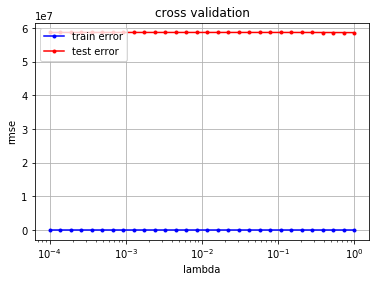

In [9]:
seed = 1
degree = 6
k_fold = 10
lambdas = np.logspace(-4, 0, 30)
k_indices = build_k_indices(y, k_fold, seed)
rmse_tr = []
rmse_te = []
best_loss = 999
for k in range(k_fold):
    temp_tr = []
    temp_te = []
    best_test_ws = []
    for lambda_ in lambdas:
        tr_loss, te_loss, ws = cross_validation(y, x, k_indices, k, lambda_, degree)
        if(te_loss < best_loss):
            best_loss = te_loss
            best_lambda = lambda_
        temp_tr.append(tr_loss)
        temp_te.append(te_loss)
        # print("Lambda = " + str(lambda_) + " tr_loss = " + str(tr_loss) + " te_loss = " + str(te_loss))
    print("After lambdas iteration, the best lambda is : " + str(best_lambda) + " for k-fold : " + str(k) + " with best loss = " + str(best_loss))
    best_test_ws.append(lambda_)
    rmse_tr.append(temp_tr)
    rmse_te.append(temp_te)

rmse_tr = np.matrix(rmse_tr)
rmse_tr = np.mean(rmse_tr, axis=0)
rmse_tr = np.reshape(rmse_tr, (len(lambdas),-1))
rmse_te = np.matrix(rmse_te)
rmse_te = np.mean(rmse_te, axis=0)
rmse_te = np.reshape(rmse_te, (len(lambdas),-1))

cross_validation_visualization(lambdas, rmse_tr, rmse_te)